In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
from statsmodels.tsa.stattools import adfuller

#function to define if the time series is stationary
def test_stationarity(timeseries):
    #determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label= 'Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingStd, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rollinn Mean and Standar Deviation')
    plt.show(block=False)
    
    #perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['test Statistic:', 'p-value', '#lags used', 'number os observation used: '])
    for key, value in dftest[4].items():
        dfoutput['Critical value %s'%key] = value
    print(dfoutput)

In [29]:
frame = pd.read_csv('count_per_month_til2019.csv')
pd.to_datetime(frame['date'], infer_datetime_format = True)

0     2010-01-01
1     2010-02-01
2     2010-03-01
3     2010-04-01
4     2010-05-01
         ...    
115   2019-08-01
116   2019-09-01
117   2019-10-01
118   2019-11-01
119   2019-12-01
Name: date, Length: 120, dtype: datetime64[ns]

In [30]:
for index, row in frame.iterrows():
    frame.loc[index, 'date'] = datetime.strptime(frame.iloc[index,0], "%m/%d/%Y")

In [31]:
frame.dtypes

date     object
count     int64
dtype: object

In [32]:
frame_month = frame.set_index('date')
frame_month

,count
date,
2010-01-01,446
2010-02-01,471
2010-03-01,489
2010-04-01,456
2010-05-01,470
...,...
2019-08-01,4120
2019-09-01,4116
2019-10-01,4184


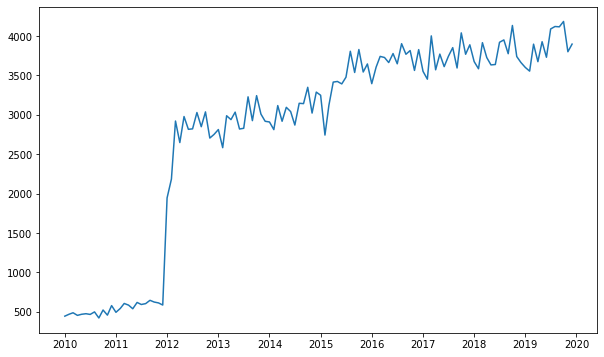

In [33]:
plt.plot(frame_month)

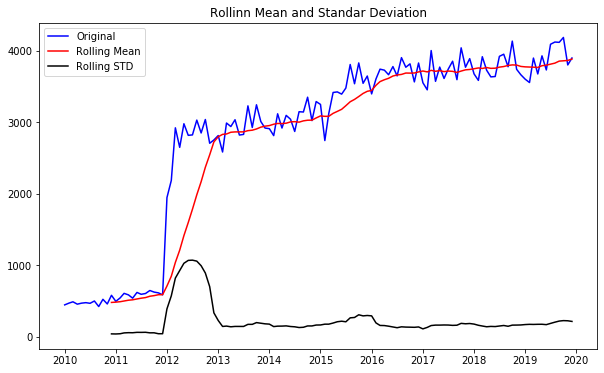

Results of Dickey-Fuller Test: 
test Statistic:                  -2.507163
p-value                           0.113741
#lags used                       12.000000
number os observation used:     107.000000
Critical value 1%                -3.492996
Critical value 5%                -2.888955
Critical value 10%               -2.581393
dtype: float64


In [34]:
test_stationarity(frame_month)

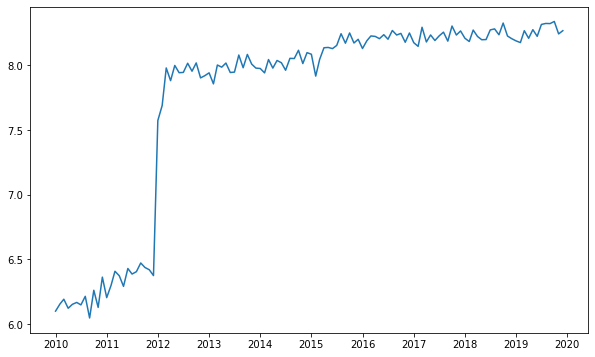

In [35]:
indexedDataset_logScale = np.log(frame_month)
plt.plot(indexedDataset_logScale)

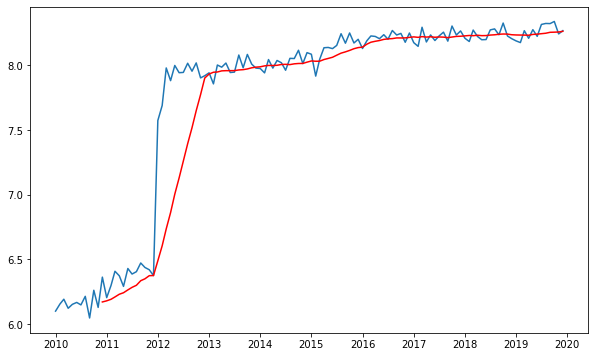

In [36]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [37]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(3)

,count
date,
2010-12-01,0.191836
2011-01-01,0.024680
2011-02-01,0.107063


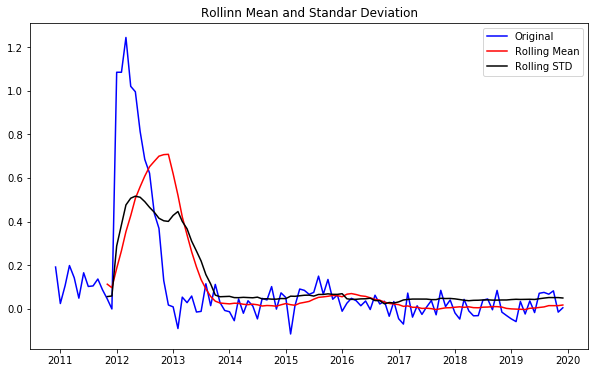

Results of Dickey-Fuller Test: 
test Statistic:                 -1.875592
p-value                          0.343629
#lags used                      12.000000
number os observation used:     96.000000
Critical value 1%               -3.500379
Critical value 5%               -2.892152
Critical value 10%              -2.583100
dtype: float64


In [38]:
test_stationarity(datasetLogScaleMinusMovingAverage)

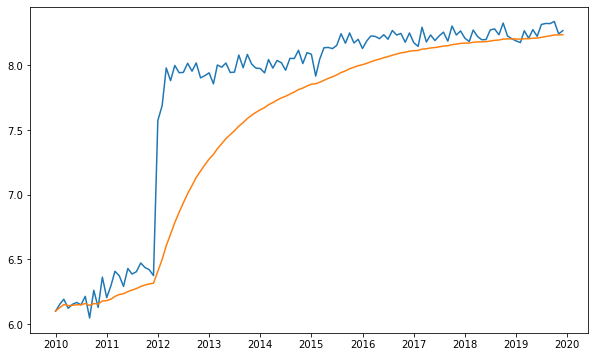

In [39]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage)

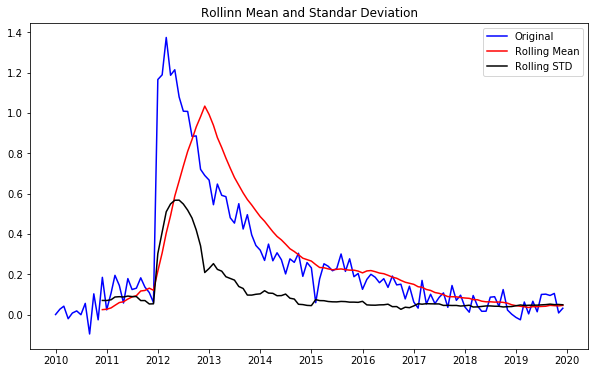

Results of Dickey-Fuller Test: 
test Statistic:                  -2.228367
p-value                           0.196112
#lags used                        2.000000
number os observation used:     117.000000
Critical value 1%                -3.487517
Critical value 5%                -2.886578
Critical value 10%               -2.580124
dtype: float64


In [40]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

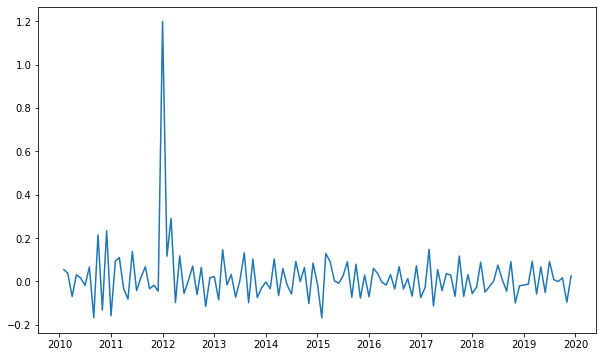

In [41]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

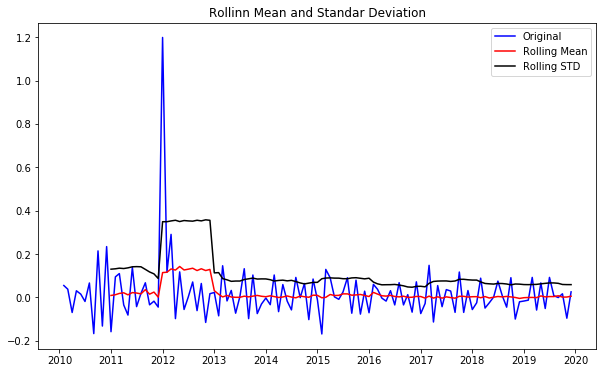

Results of Dickey-Fuller Test: 
test Statistic:                -6.708224e+00
p-value                         3.737767e-09
#lags used                      1.000000e+00
number os observation used:     1.170000e+02
Critical value 1%              -3.487517e+00
Critical value 5%              -2.886578e+00
Critical value 10%             -2.580124e+00
dtype: float64


In [42]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

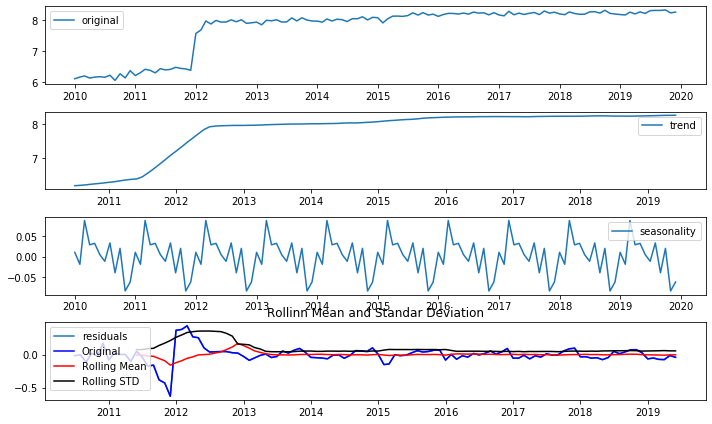

Results of Dickey-Fuller Test: 
test Statistic:                  -4.928083
p-value                           0.000031
#lags used                        7.000000
number os observation used:     100.000000
Critical value 1%                -3.497501
Critical value 5%                -2.890906
Critical value 10%               -2.582435
dtype: float64


In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =  seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

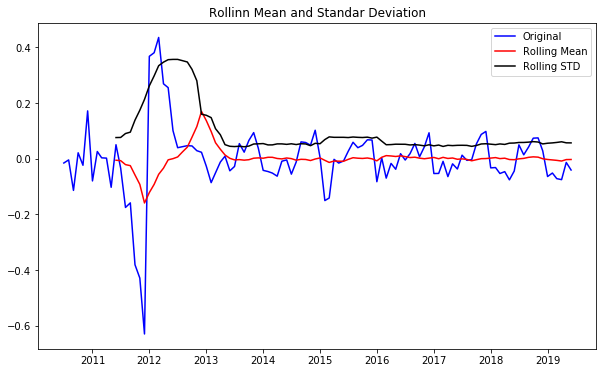

Results of Dickey-Fuller Test: 
test Statistic:                  -4.928083
p-value                           0.000031
#lags used                        7.000000
number os observation used:     100.000000
Critical value 1%                -3.497501
Critical value 5%                -2.890906
Critical value 10%               -2.582435
dtype: float64


In [44]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


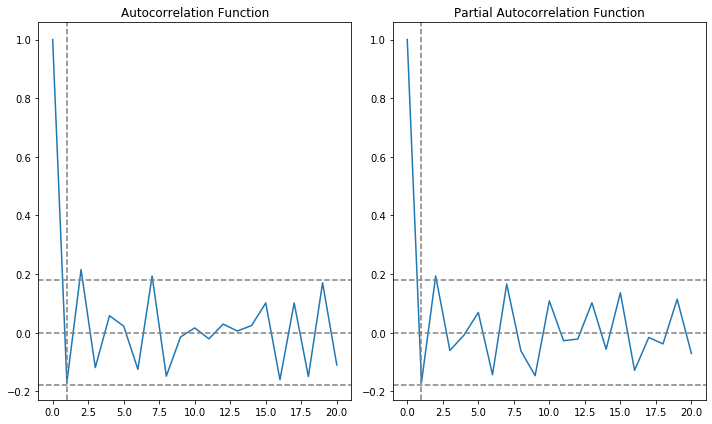

In [45]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axvline(x=1, linestyle='--', color='grey')
plt.title('Autocorrelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axvline(x=1, linestyle='--', color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Plotting AR model


C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


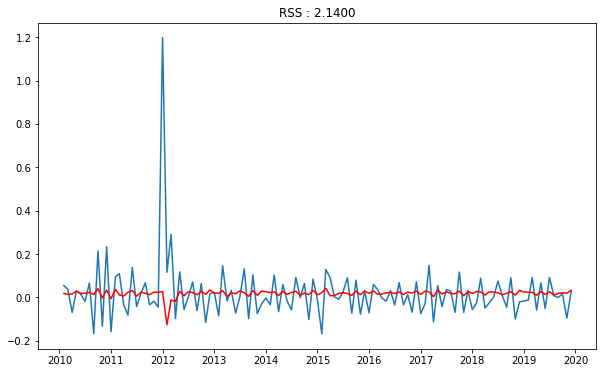

In [46]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedDataset_logScale, order=(0,1,1))
results_ar = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS : %.4f'% sum((results_ar.fittedvalues-datasetLogDiffShifting['count'])**2))
print('Plotting AR model')

Plotting AR model


C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


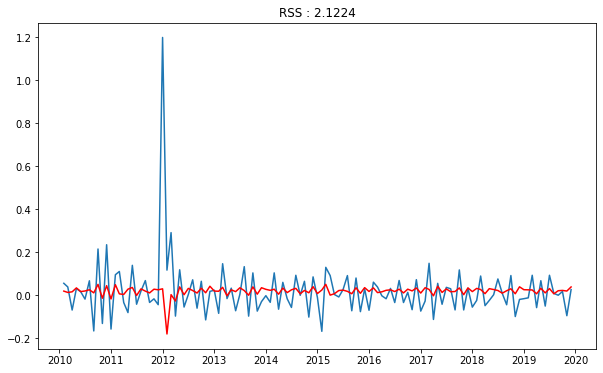

In [47]:
#MA model
model = ARIMA(indexedDataset_logScale, order=(1,1,0))
results_ar = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS : %.4f'% sum((results_ar.fittedvalues-datasetLogDiffShifting['count'])**2))
print('Plotting AR model')

Plotting AR model


C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jerry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


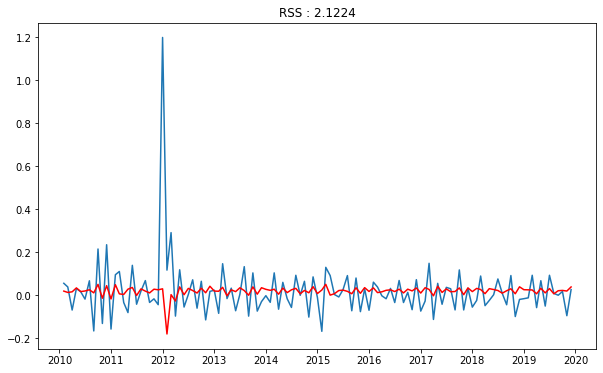

In [75]:
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS : %.4f'% sum((results_ar.fittedvalues-datasetLogDiffShifting['count'])**2))
print('Plotting AR model')

In [76]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2010-02-01    0.018153
2010-03-01    0.010767
2010-04-01    0.018078
2010-05-01    0.033968
2010-06-01    0.008468
dtype: float64


In [77]:
#convert to cummulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2010-02-01    0.018153
2010-03-01    0.028920
2010-04-01    0.046999
2010-05-01    0.080967
2010-06-01    0.089435
dtype: float64


In [78]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['count'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2010-01-01    6.100319
2010-02-01    6.173012
2010-03-01    6.221283
2010-04-01    6.169492
2010-05-01    6.233700
dtype: float64

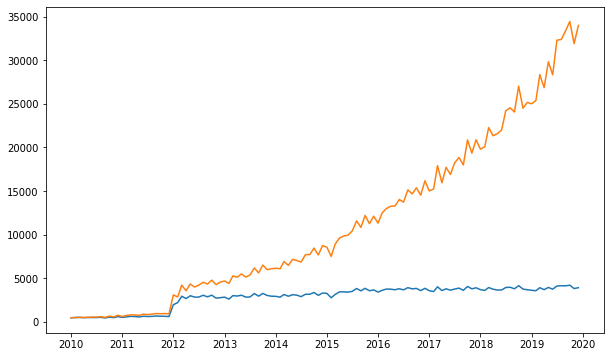

In [79]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(frame_month)
plt.plot(predictions_ARIMA)

In [80]:
indexedDataset_logScale

,count
date,
2010-01-01,6.100319
2010-02-01,6.154858
2010-03-01,6.192362
2010-04-01,6.122493
2010-05-01,6.152733
...,...
2019-08-01,8.323608
2019-09-01,8.322637
2019-10-01,8.339023


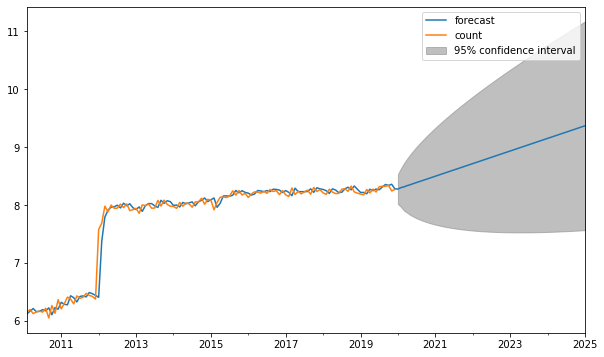

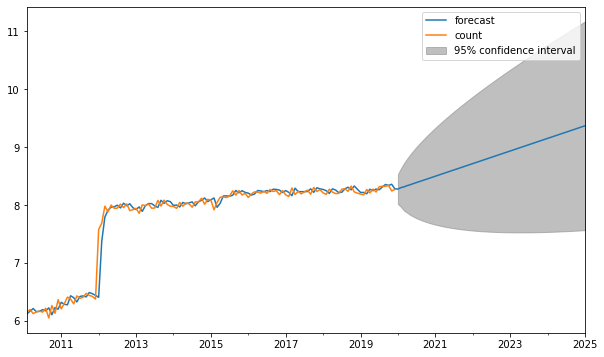

In [81]:
results_ARIMA.plot_predict(1,180)
# x=results_ARIMA.forecast(steps=12)